In [2]:
import pandas as pd

In [3]:
#Data Loading

#Loading the dataset
df = pd.read_excel('Superstore_data.xlsx')

#Display first 50 rows
pd.set_option('display.max_columns', None)
print(df.head(50))

    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     2718  CA-2016-100006 2016-09-07 2016-09-13  Standard Class    DK-13375   
1     6288  CA-2016-100090 2016-07-08 2016-07-12  Standard Class    EB-13705   
2     6289  CA-2016-100090 2016-07-08 2016-07-12  Standard Class    EB-13705   
3     9515  CA-2016-100293 2016-03-14 2016-03-18  Standard Class    NF-18475   
4     3084  CA-2016-100328 2016-01-28 2016-02-03  Standard Class    JC-15340   
5     3836  CA-2016-100363 2016-04-08 2016-04-15  Standard Class    JM-15655   
6     3837  CA-2016-100363 2016-04-08 2016-04-15  Standard Class    JM-15655   
7     9441  CA-2016-100391 2016-05-25 2016-05-29  Standard Class    BW-11065   
8     6569  CA-2016-100678 2016-04-18 2016-04-22  Standard Class    KM-16720   
9     6570  CA-2016-100678 2016-04-18 2016-04-22  Standard Class    KM-16720   
10    6571  CA-2016-100678 2016-04-18 2016-04-22  Standard Class    KM-16720   
11    6572  CA-2016-100678 2016-04-18 20

In [4]:
#Data Shape
data_shape = df.shape
print(f"Data shape =\n {data_shape}\n")

#Data Columns
data_columns = df.columns
print(f"Data Columns =\n {data_columns}\n")

#Basic Info
data_info = df.info()
print(f"Data Info = {data_info}")

Data shape =
 (9994, 21)

Data Columns =
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   C

In [5]:
#Data cleaning

#Handling missing values
print(df.isnull().sum())
df['Postal Code'] = df['Postal Code'].fillna('00000')

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64


In [6]:
#Convert data types
df['Postal Code'] =  df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9994 non-null   int32         
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [7]:
#Check for duplicates
print("Duplicates exist = ", df.duplicated(keep=False).sum())
print("Duplicate IDs exist = ", df.duplicated(subset=['Row ID', 'Order ID', 'Product ID']).sum())

Duplicates exist =  0
Duplicate IDs exist =  0


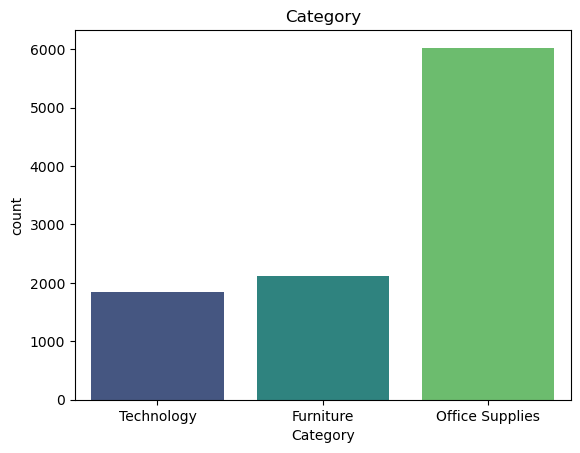

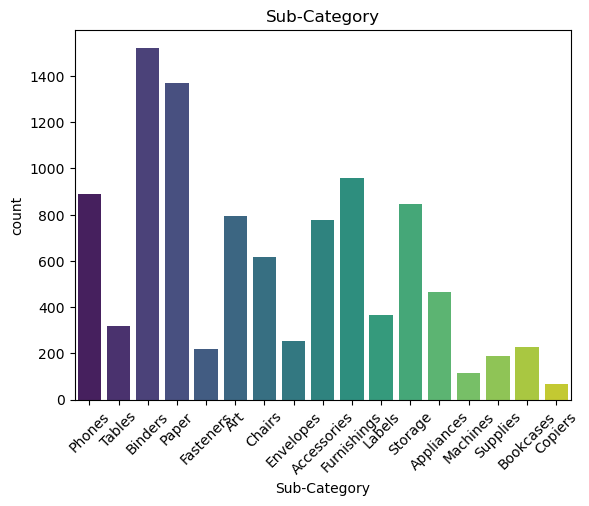

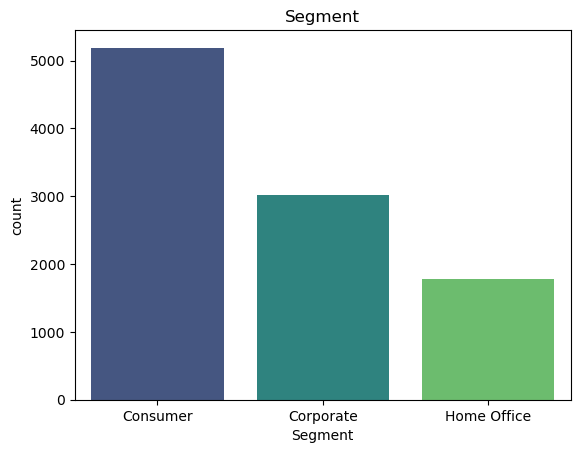

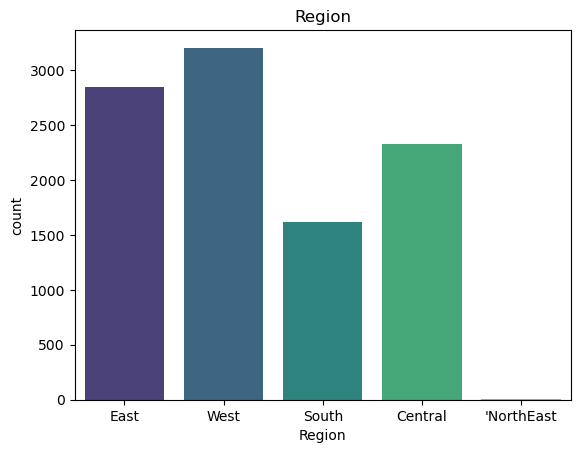

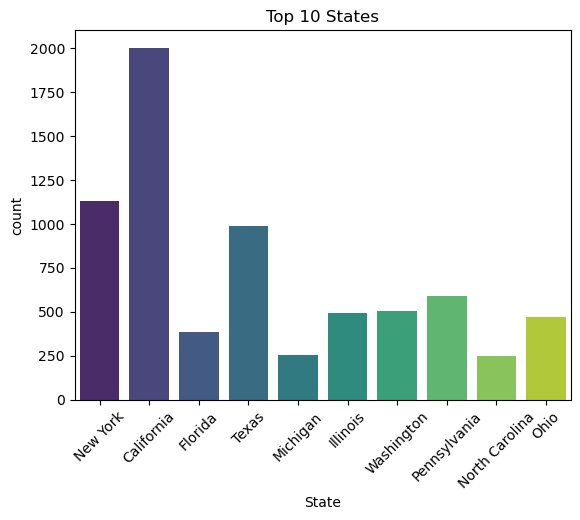

In [19]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Bar Chart
bar_chart_data = df[['Category', 'Sub-Category', 'Segment', 'Region', 'State']].copy()
for data in bar_chart_data:
    if data == 'State':
        top_states = bar_chart_data['State'].value_counts().nlargest(10).index
        sns.countplot( 
            x='State', 
            data=bar_chart_data[bar_chart_data['State'].isin(top_states)],
            hue='State',
            palette='viridis'
        )
        plt.xticks(rotation=45)
        plt.title("Top 10 States")
        plt.show()

    else:
        if data == 'Sub-Category':
            plt.xticks(rotation=45)

        sns.countplot(
            x=f'{data}', 
            data=bar_chart_data, 
            hue=f'{data}',
            palette='viridis'  
        )

        plt.title(f"{data}")
        plt.show()



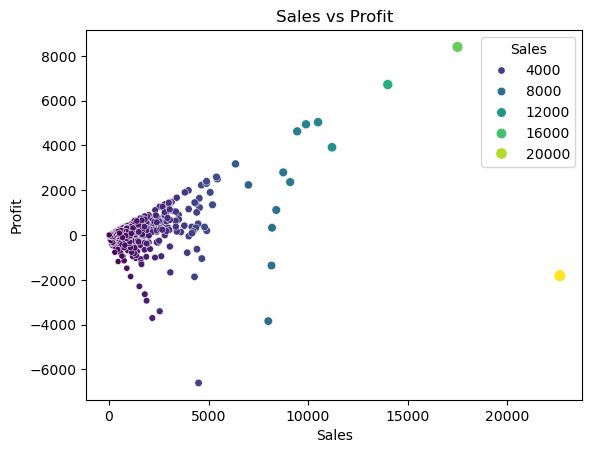

In [9]:
#Scatter Plot

#Sales vs Profit
sales_profit_data = df[['Sales', 'Profit']].copy()
sns.scatterplot(
    data=sales_profit_data,
    x='Sales',
    y='Profit',
    hue='Sales',
    size='Sales',
    palette='viridis'
)
plt.title("Sales vs Profit")
plt.show()

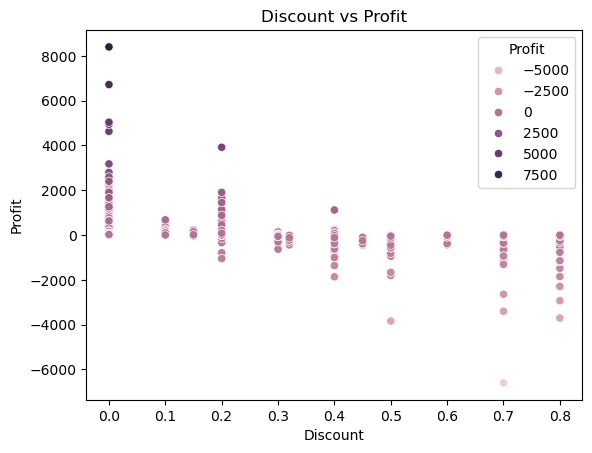

In [10]:
#Discount vs Profit
discount_profit_data = df[['Discount', 'Profit']].copy()
sns.scatterplot(
    data=discount_profit_data,
    x='Discount',
    y='Profit',
    hue='Profit'
)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Discount vs Profit")
plt.show()

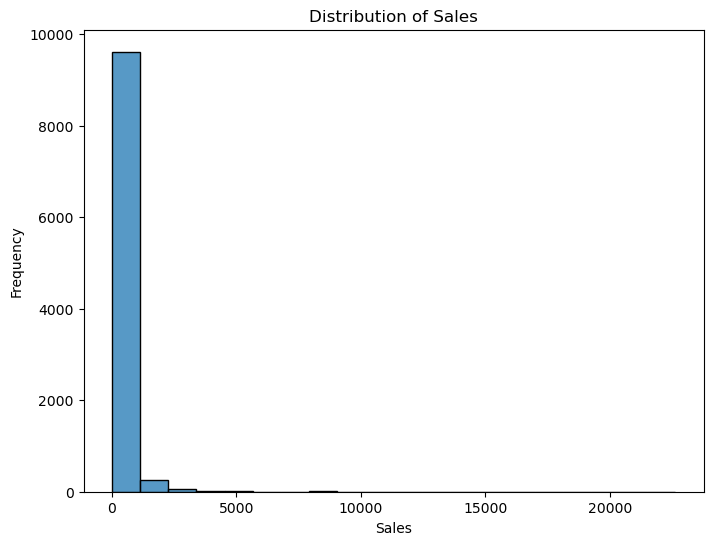

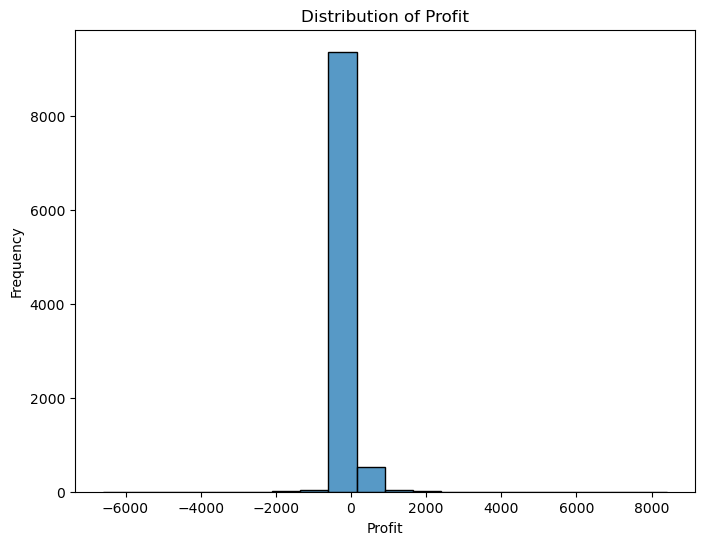

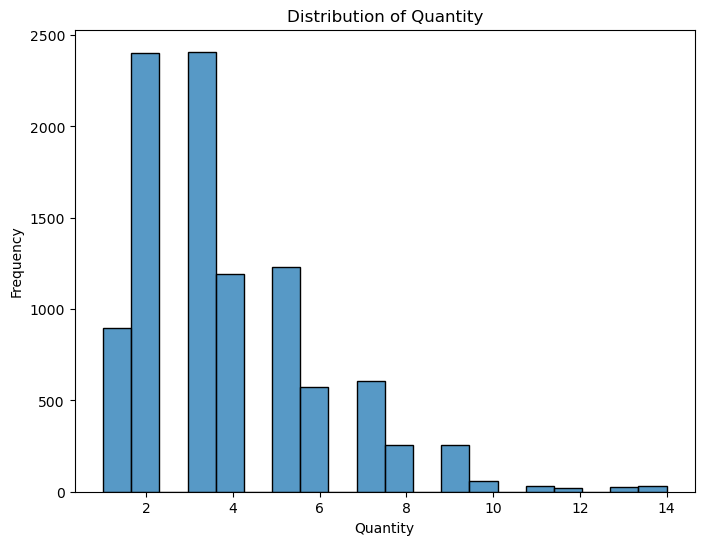

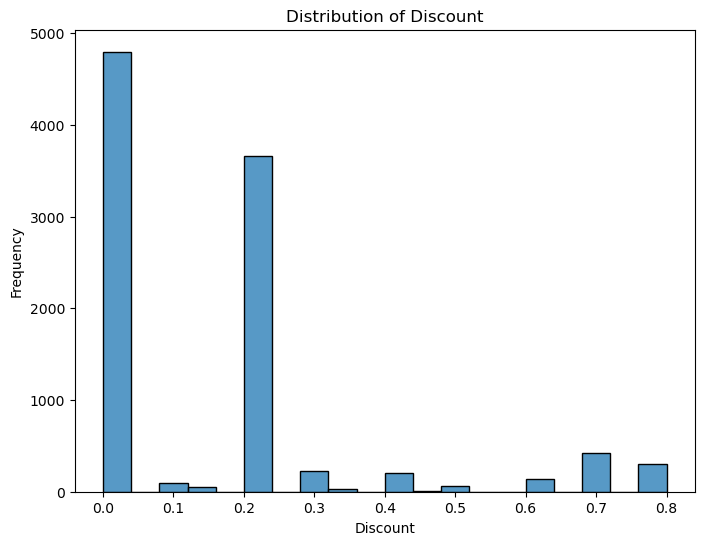

In [11]:
#Histogram
numeric_distribution_data = df[['Sales', 'Profit', 'Quantity', 'Discount']].copy()
for col in numeric_distribution_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numeric_distribution_data[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

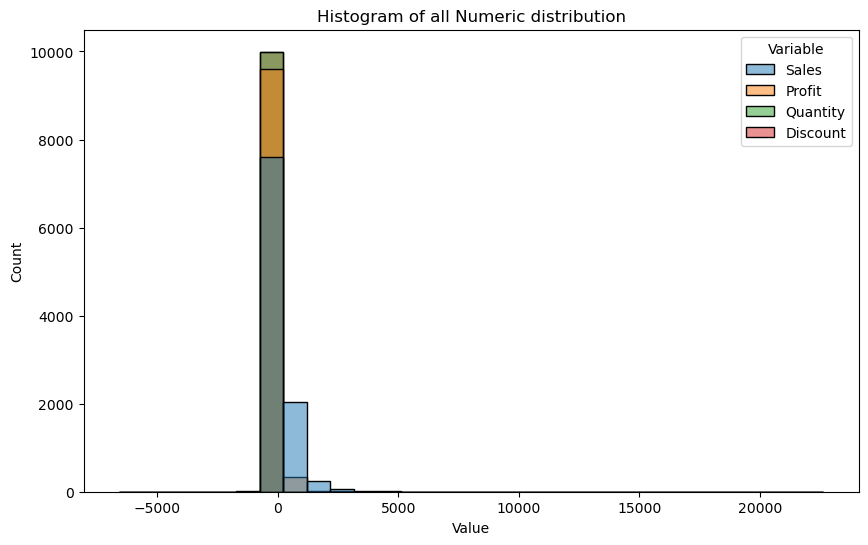

In [12]:
numeric_melted = numeric_distribution_data.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(10, 6))
sns.histplot(data=numeric_melted, x='Value', hue='Variable', bins=30)
plt.title('Histogram of all Numeric distribution')
plt.show()

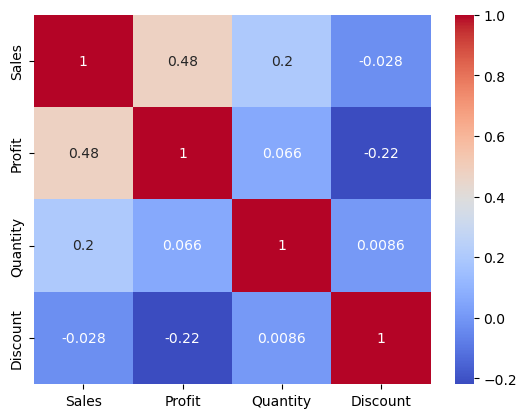

<Figure size 1000x600 with 0 Axes>

In [13]:
#Heatmap
corr_matrix = numeric_distribution_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(10,6))
plt.show()

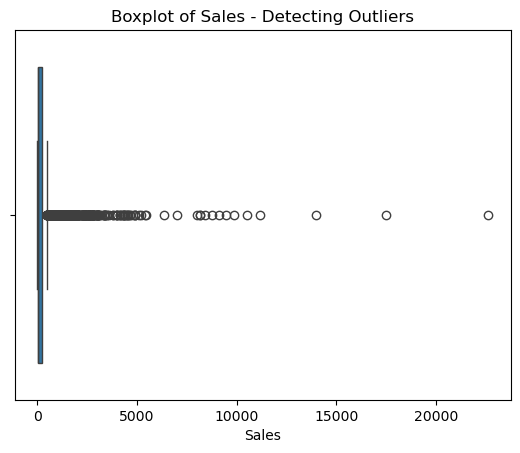

<Figure size 1000x600 with 0 Axes>

In [14]:
#Outlier Detection
numerical_sales_data = df[['Sales', 'Profit', 'Discount']]

#Sales outliers
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales - Detecting Outliers')
plt.figure(figsize=(10,6))
plt.show()

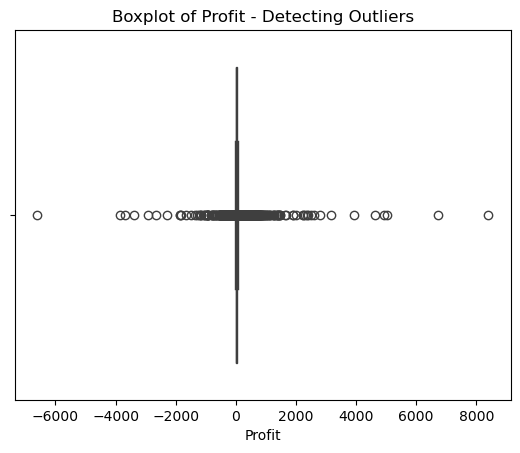

In [15]:
#Profit Outliers
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit - Detecting Outliers')
plt.show()

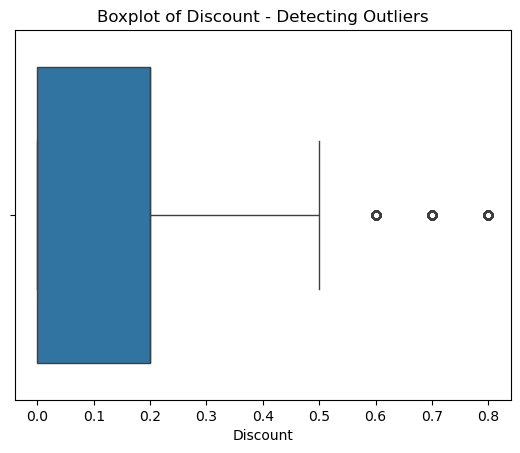

In [16]:
#Discount outliers
sns.boxplot(x=df['Discount'])
plt.title('Boxplot of Discount - Detecting Outliers')
plt.show()